In [26]:
# importing modules
import pandas as pd
from matplotlib import pyplot as py
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [3]:
#reading dataset
df_data=pd.read_csv("D:/data science/dataset.csv")

In [4]:
# understanding dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   144233 non-null  int64  
 1   TransactionDT   144233 non-null  int64  
 2   TransactionAmt  144233 non-null  float64
 3   card4           144049 non-null  object 
 4   card6           144055 non-null  object 
 5   P_emaildomain   130842 non-null  object 
 6   isFraud         144233 non-null  int64  
 7   DeviceType      140810 non-null  object 
 8   DeviceInfo      118666 non-null  object 
 9   ProductCD       144233 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 11.0+ MB


In [5]:
df_data.describe()

,TransactionID,TransactionDT,TransactionAmt,isFraud
count,1.442330e+05,1.442330e+05,144233.000000,144233.000000
mean,3.236329e+06,6.166958e+06,78.184787,0.078470
std,1.788496e+05,4.807714e+06,71.313721,0.268911
min,2.987004e+06,8.650600e+04,0.250977,0.000000
25%,3.077142e+06,1.885289e+06,25.453125,0.000000
50%,3.198818e+06,4.913738e+06,50.000000,0.000000
75%,3.392923e+06,1.025794e+07,100.000000,0.000000
max,3.577534e+06,1.581103e+07,309.455942,1.000000


In [6]:
df_data.head()

,TransactionID,TransactionDT,TransactionAmt,card4,card6,P_emaildomain,isFraud,DeviceType,DeviceInfo,ProductCD
0,2987004,86506,50.000,mastercard,credit,gmail.com,0,mobile,SAMSUNG SM-G892A Build/NRD90M,W
1,2987008,86535,15.000,visa,debit,anonymous.com,0,mobile,iOS Device,W
2,2987010,86549,75.875,mastercard,credit,gmail.com,0,desktop,Windows,W
3,2987011,86555,16.500,mastercard,debit,hotmail.com,0,desktop,NaN,W
4,2987016,86620,30.000,visa,debit,aol.com,0,desktop,MacOS,H


In [7]:
# Studying table
def studytable(df):
    table_info=pd.DataFrame(df.dtypes, columns=['dtypes'])
    table_info=table_info.reset_index()
    table_info["col_name"]=df.columns
    table_info['missing']=df.isnull().sum().values
    table_info['unique']=df.nunique().values
    table_info.set_index('col_name', inplace=True)
    table_info.drop('index', inplace=True, axis=1)
    print(table_info['dtypes'].unique().tolist())
    return table_info

In [8]:
studytable(df_data)

[dtype('int64'), dtype('float64'), dtype('O')]


,dtypes,missing,unique
col_name,,,
TransactionID,int64,0,144233
TransactionDT,int64,0,142734
TransactionAmt,float64,0,4432
card4,object,184,4
card6,object,178,3
P_emaildomain,object,13391,59
isFraud,int64,0,2
DeviceType,object,3423,2
DeviceInfo,object,25567,1786


In [147]:
df_data['isFraud'].value_counts()

0    132915
1     11318
Name: isFraud, dtype: int64

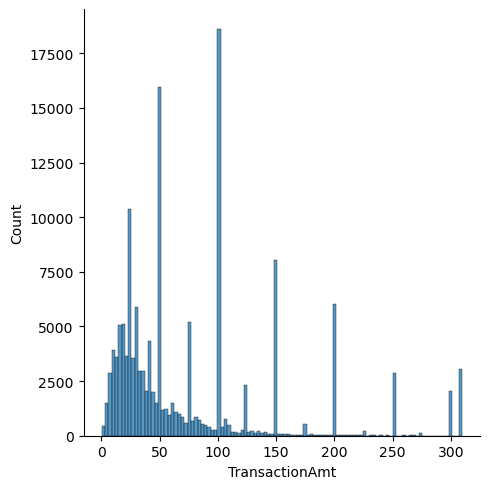

In [13]:
# working with TransactionAmt
sns.displot(df_data['TransactionAmt'])

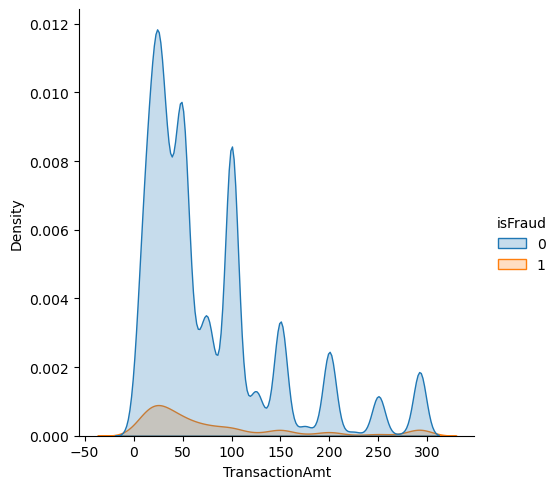

In [19]:
data_slim = df_data[['TransactionAmt','isFraud']]
sns.displot(data_slim,
            x="TransactionAmt", 
            hue="isFraud", 
            kind="kde", 
            fill="true")
py.show()

In [14]:
# handling the outliers in transactionAmt
# TransactionAmt is skewed so we will use IQR for outliers
q1=df_data['TransactionAmt'].quantile(0.25)
q3=df_data['TransactionAmt'].quantile(0.75)
IQR=q3-q1
low_outliers=len(df_data[df_data['TransactionAmt']<q1])
high_outlier=len(df_data[df_data['TransactionAmt']>q3])
print("no of outliers below q1=",low_outliers)
print("no of outliers above q3=",high_outlier)
print("total no of rows", len(df_data))

no of outliers below q1= 36047
no of outliers above q3= 30328
total no of rows 144233


In [15]:
# setting up limit for replacing outliers
upper_limit=df_data['TransactionAmt'].mean()+ 3*df_data['TransactionAmt'].std()
print("upper_limit",upper_limit)
data=len(df_data[(df_data['TransactionAmt']<upper_limit)])
print("data % within 3 std ",(data/len(df_data)*100))

upper_limit 292.1259491140883
data % within 3 std  96.45434817274825


In [16]:
# replacing all values above 3 std with upper limit
df_data['TransactionAmt']= np.where(df_data['TransactionAmt']>upper_limit,upper_limit,df_data['TransactionAmt'])

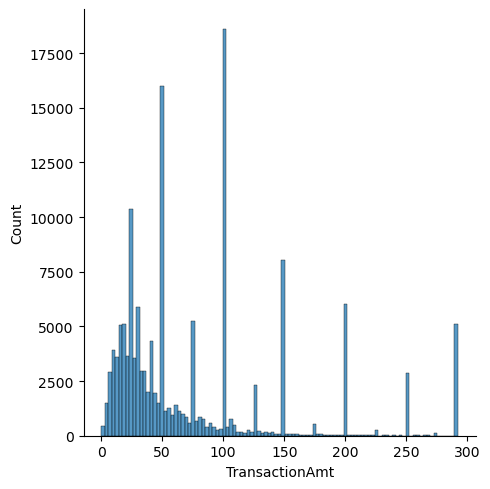

In [17]:
# working with TransactionAmt
sns.displot(df_data['TransactionAmt'])

                TransactionAmt  TransactionDT   isFraud
TransactionAmt        1.000000      -0.109143  0.018238
TransactionDT        -0.109143       1.000000  0.089427
isFraud               0.018238       0.089427  1.000000


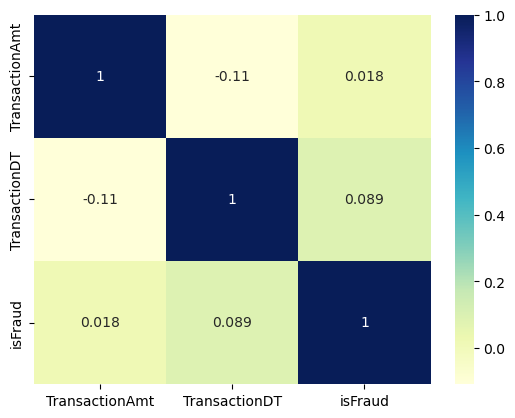

In [134]:
# correlation of numerical features
data_slim=df_data[['TransactionAmt','TransactionDT','isFraud']]
print(data_slim.corr())
# plotting correlation heatmap
dataplot = sns.heatmap(data_slim.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
py.show()

In [20]:
# working with card4
pd.crosstab(df_data['card4'], df_data['isFraud']) 
#chances of fraud are high with mastercard

isFraud,0,1
card4,,
american express,8059,239
discover,2089,177
mastercard,40266,3920
visa,82331,6968


In [23]:
df_data['card4'].isna().sum() #184 records
df_data['card4']=df_data['card4'].fillna('others')

In [115]:
#bar plotting, prob mass funct
def df_plotting(df,col):
    tmp=pd.crosstab(df[col],df['isFraud'])
    tmp=tmp.reset_index()
    tmp.rename(columns={0:'clean',1:'fraud'},inplace=True)
    tmp['fraud_rate'] = (tmp['fraud']/(tmp['clean']+tmp['fraud']))*100
    tmp['total'] = tmp['clean']+tmp['fraud']
    py.figure(figsize=(16,14))    
    py.suptitle(f'{col} Distributions ', fontsize=24)
    py.subplot(211)
    g = sns.barplot( x=col, y='total', data=tmp[[col,'total']])
    g22 = g.twinx()
    g2 = sns.pointplot(x=col, y=tmp['fraud_rate'], data=tmp )
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    py.show()

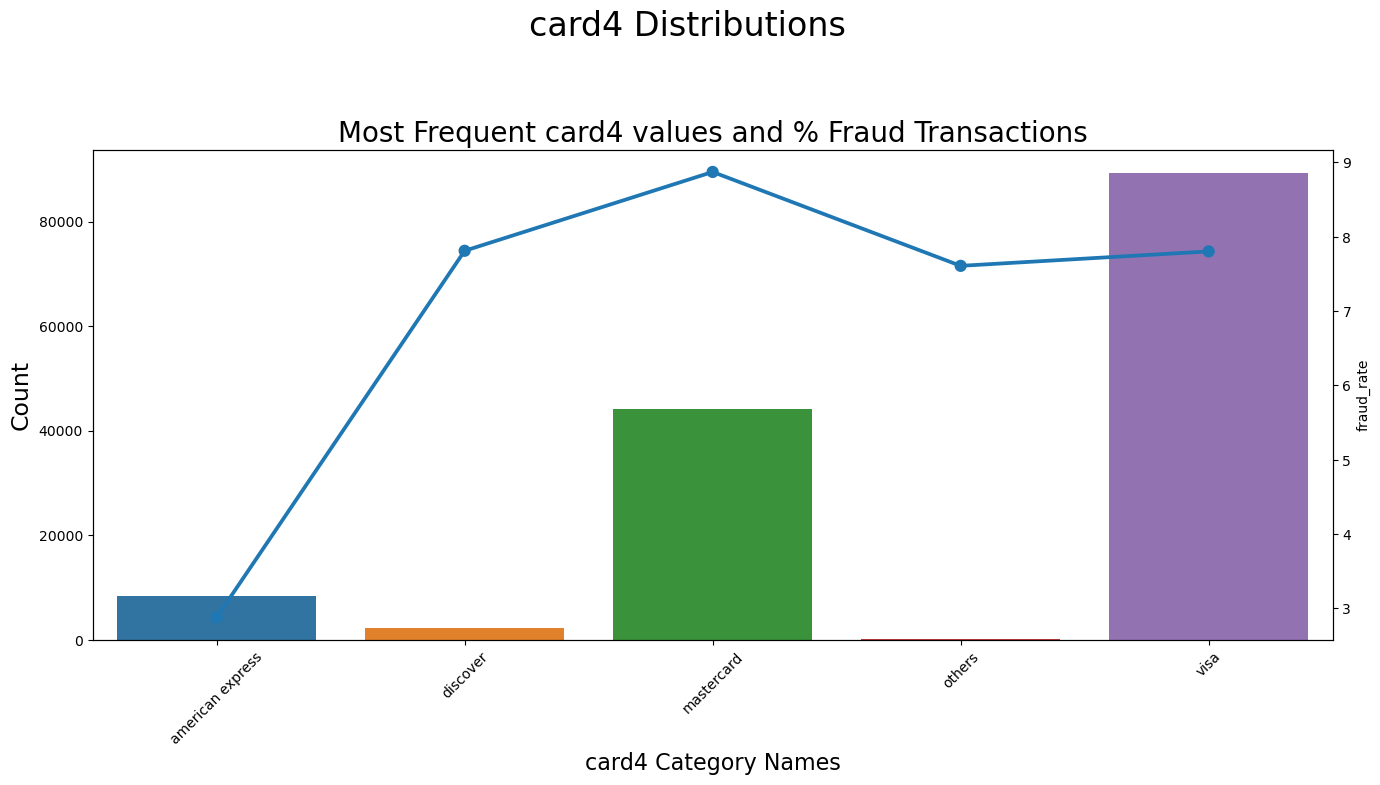

In [116]:
df_plotting(df_data, 'card4')

In [27]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df =pd.DataFrame(enc.fit_transform(df_data[['card4']]).toarray())
enc_df.columns=enc.get_feature_names_out(['card4'])
df_data=df_data.join(enc_df)

In [28]:
df_data.head()

,TransactionID,TransactionDT,TransactionAmt,card4,card6,P_emaildomain,isFraud,DeviceType,DeviceInfo,ProductCD,card4_american express,card4_discover,card4_mastercard,card4_others,card4_visa
0,2987004,86506,50.000,mastercard,credit,gmail.com,0,mobile,SAMSUNG SM-G892A Build/NRD90M,W,0.0,0.0,1.0,0.0,0.0
1,2987008,86535,15.000,visa,debit,anonymous.com,0,mobile,iOS Device,W,0.0,0.0,0.0,0.0,1.0
2,2987010,86549,75.875,mastercard,credit,gmail.com,0,desktop,Windows,W,0.0,0.0,1.0,0.0,0.0
3,2987011,86555,16.500,mastercard,debit,hotmail.com,0,desktop,NaN,W,0.0,0.0,1.0,0.0,0.0
4,2987016,86620,30.000,visa,debit,aol.com,0,desktop,MacOS,H,0.0,0.0,0.0,0.0,1.0


In [29]:
# working with card6
pd.crosstab(df_data['card6'], df_data['isFraud'])
# chances of fraud are higher for credit cards

isFraud,0,1
card6,,
charge card,15,0
credit,68397,6693
debit,64337,4613


In [31]:
df_data['card6'].isna().sum() # 178 records
df_data['card6']=df_data['card6'].fillna('others')

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df =pd.DataFrame(enc.fit_transform(df_data[['card6']]).toarray())
enc_df.columns=enc.get_feature_names_out(['card6'])
df_data=df_data.join(enc_df)

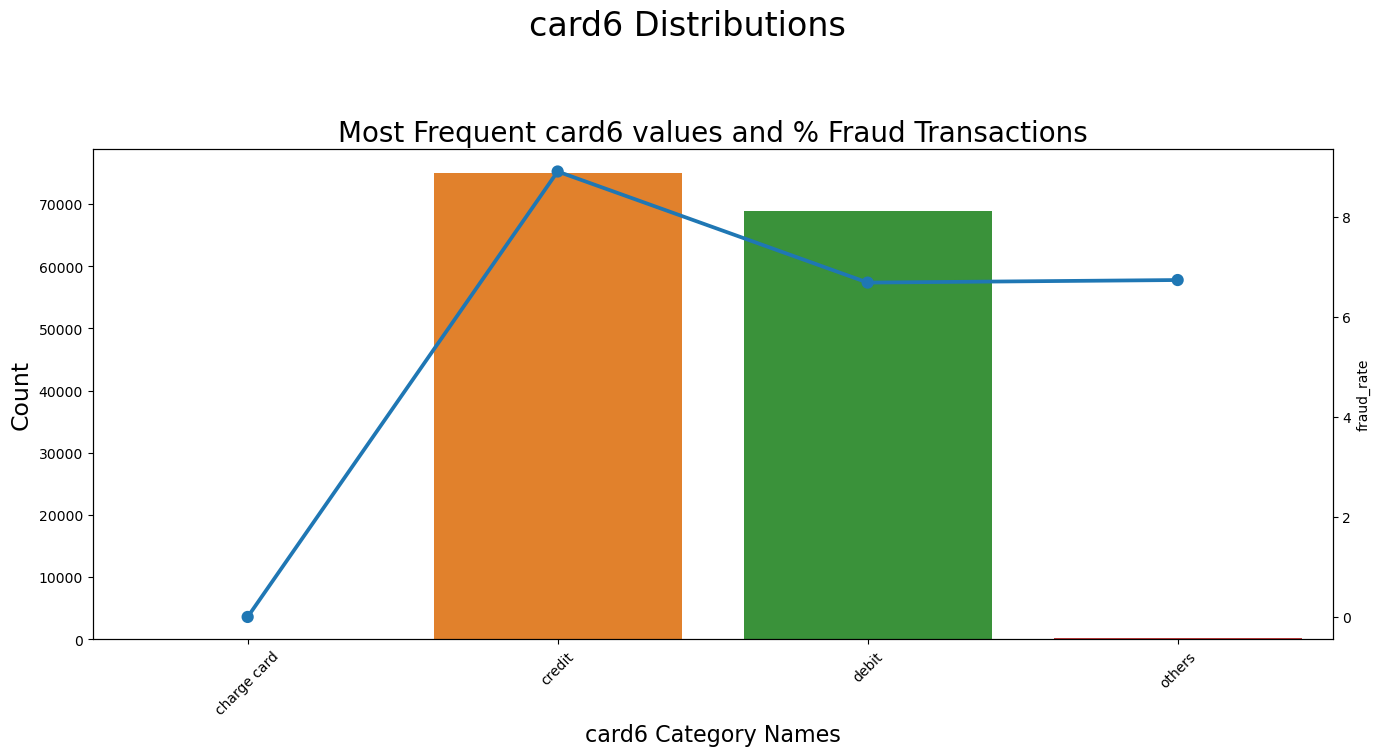

In [117]:
df_plotting(df_data, 'card6')

In [53]:
def domain_cat(x,rate):
    if(rate>0):
        return x
    else:
        return 'Other'

In [76]:
tmp = pd.crosstab(df_data['P_emaildomain'], df_data.isFraud).reset_index()
tmp.columns = ['domain', 'clean', 'fraud']
tmp['fraud_rate'] = (tmp['fraud']/(tmp['clean']+tmp['fraud']))*100
tmp['domain_name'] = tmp.apply(lambda x: domain_cat(x['domain'], x['fraud_rate']), axis=1)
tmp['P_emaildomain'] = tmp['domain']
df_data = pd.merge(df_data, tmp[['P_emaildomain','domain_name']], on='P_emaildomain', how='left')

,domain,clean,fraud,fraud_rate
16,gmail.com,47875,6265,11.571851
19,hotmail.com,23741,2041,7.916376
1,anonymous.com,17229,611,3.424888
53,yahoo.com,11181,486,4.165595
2,aol.com,4224,82,1.904320
9,comcast.net,2154,42,1.912568
35,outlook.com,1927,419,17.860188
54,yahoo.com.mx,1174,8,0.676819
31,msn.com,1050,19,1.777362
23,icloud.com,919,103,10.078278


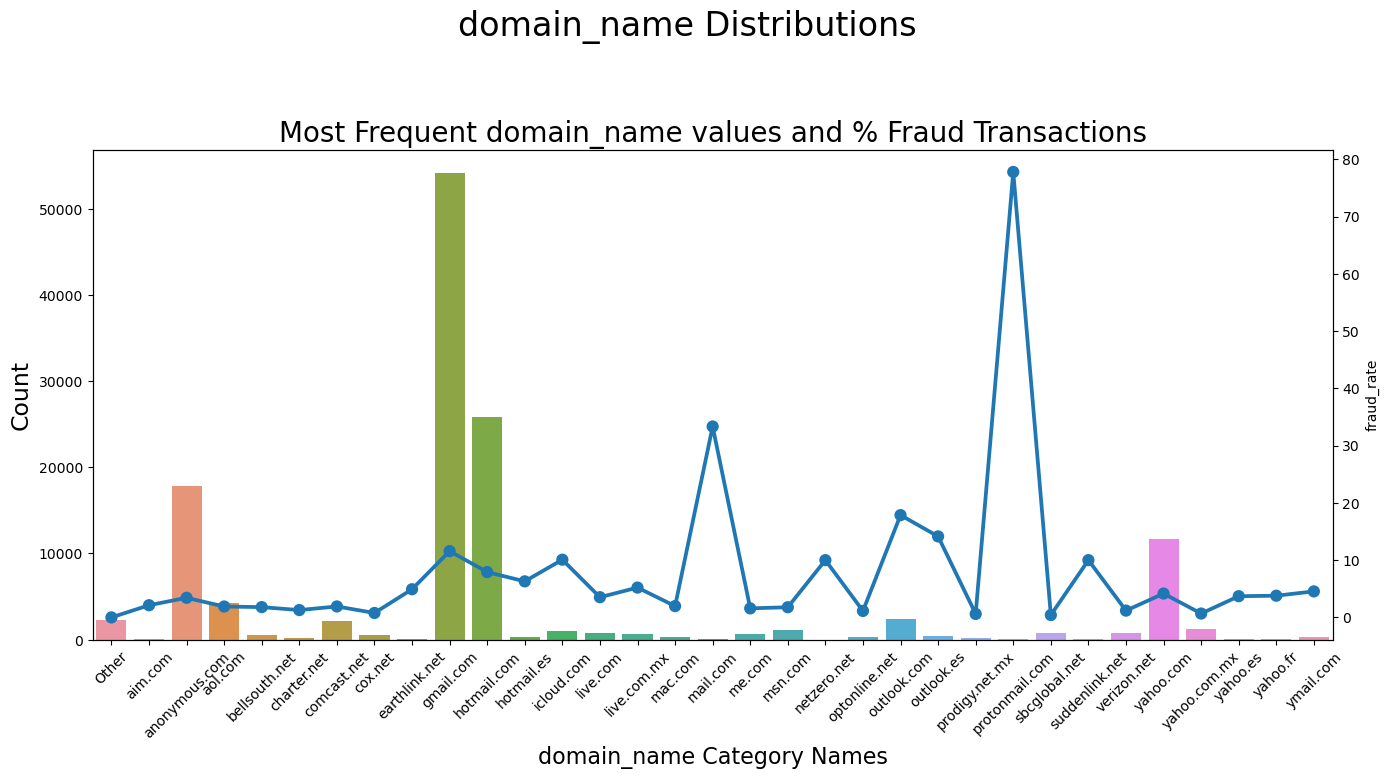

In [119]:
df_plotting(df_data, 'domain_name')

In [121]:
#df_plotting(df_data, 'device_type')
df_data.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card4', 'card6',
       'P_emaildomain', 'isFraud', 'DeviceType', 'DeviceInfo', 'ProductCD',
       'card4_american express', 'card4_discover', 'card4_mastercard',
       'card4_others', 'card4_visa', 'card6_charge card', 'card6_credit',
       'card6_debit', 'card6_nan', 'domain_name'],
      dtype='object')

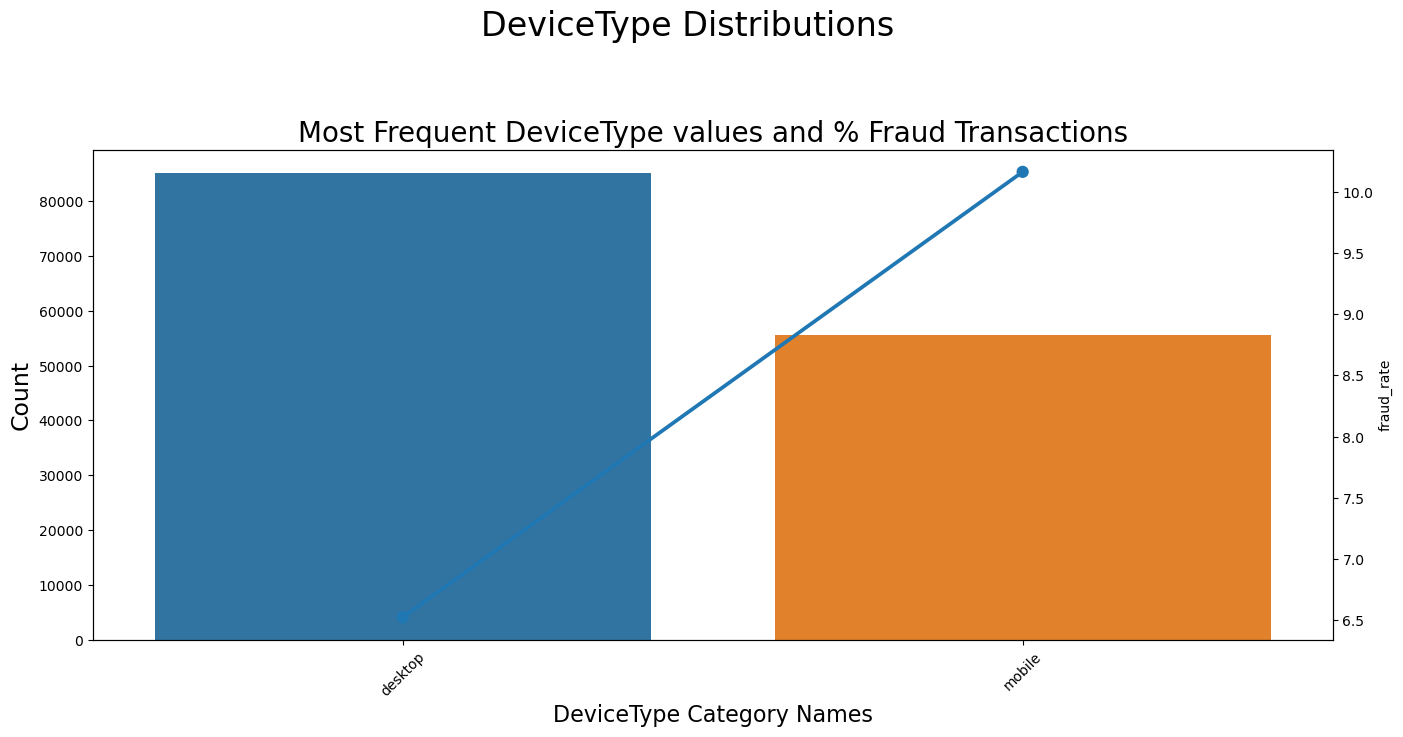

In [122]:
df_plotting(df_data, 'DeviceType')

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df =pd.DataFrame(enc.fit_transform(df_data[['DeviceType']]).toarray())
enc_df.columns=enc.get_feature_names_out(['DeviceType'])
df_data=df_data.join(enc_df)

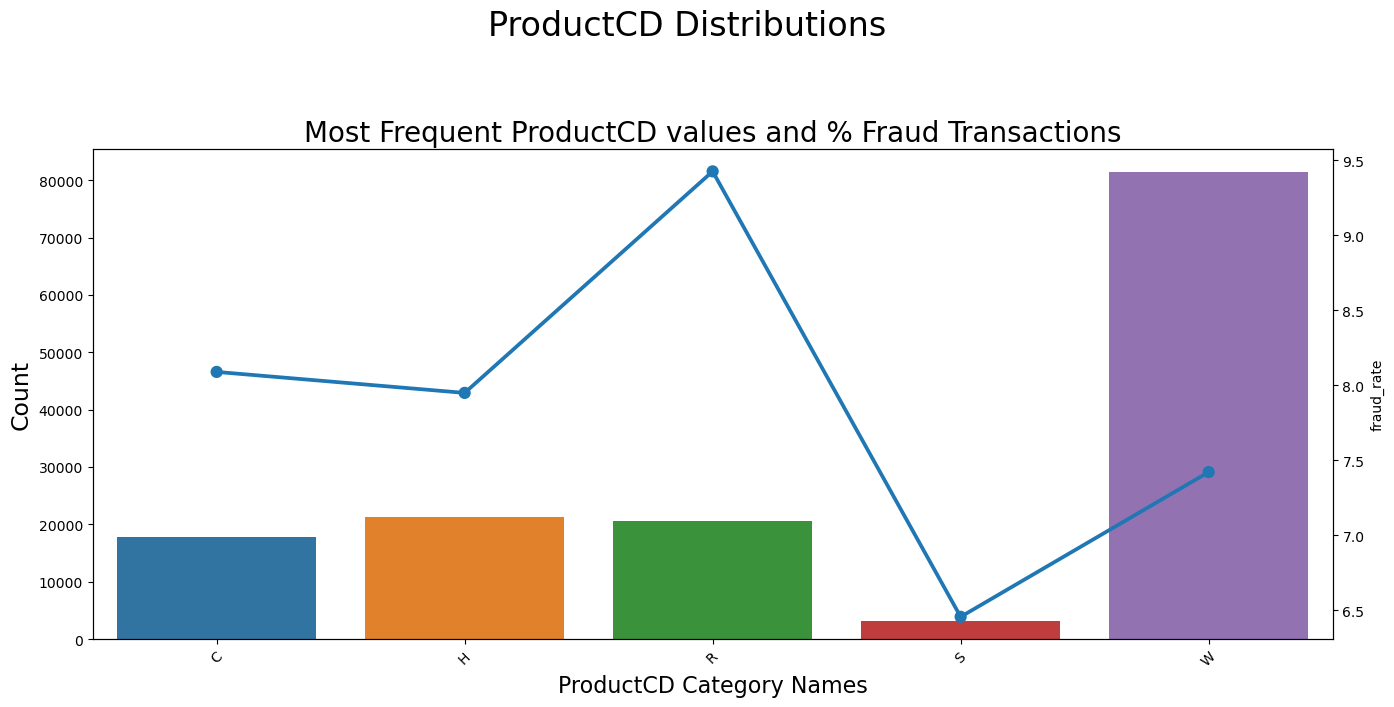

In [124]:
df_plotting(df_data, 'ProductCD')

In [135]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df =pd.DataFrame(enc.fit_transform(df_data[['ProductCD']]).toarray())
enc_df.columns=enc.get_feature_names_out(['ProductCD'])
df_data=df_data.join(enc_df)

In [ ]:
tmp = pd.crosstab(df_data['P_emaildomain'], df_data.isFraud).reset_index()
tmp.columns = ['domain', 'clean', 'fraud']
tmp['fraud_rate'] = (tmp['fraud']/(tmp['clean']+tmp['fraud']))*100


In [130]:
tmp = pd.crosstab(df_data['DeviceInfo'], df_data.isFraud).reset_index()
tmp.columns = ['DeviceInfo', 'clean', 'fraud']
tmp['fraud_rate'] = (tmp['fraud']/(tmp['clean']+tmp['fraud']))*100
tmp['total'] = tmp['clean']+tmp['fraud']
tmp['total_perc'] = (tmp['total']/sum(tmp.total))*100
tmp.sort_values('total_perc', ascending=False).head(20)

,DeviceInfo,clean,fraud,fraud_rate,total,total_perc
1598,Windows,44601,3121,6.539961,47722,40.215394
1727,iOS Device,18542,1240,6.268325,19782,16.670318
723,MacOS,12295,278,2.211087,12573,10.595284
1552,Trident/7.0,7344,96,1.290323,7440,6.269698
1743,rv:11.0,1825,76,3.997896,1901,1.601975
1769,rv:57.0,859,103,10.706861,962,0.810679
1360,SM-J700M Build/MMB29K,489,60,10.928962,549,0.462643
1199,SM-G610M Build/MMB29K,424,37,8.026030,461,0.388485
1189,SM-G531H Build/LMY48B,377,33,8.048780,410,0.345508
1771,rv:59.0,318,44,12.154696,362,0.305058


In [131]:
def deviceinfo_cat(x,perc):
    if(perc>1):
        return x
    else:
        return 'Other'

In [132]:
tmp['device_info_cat'] = tmp.apply(lambda x: deviceinfo_cat(x['DeviceInfo'], x['total_perc']), axis=1)
df_data = pd.merge(df_data, tmp[['DeviceInfo','device_info_cat']], on='DeviceInfo', how='left')

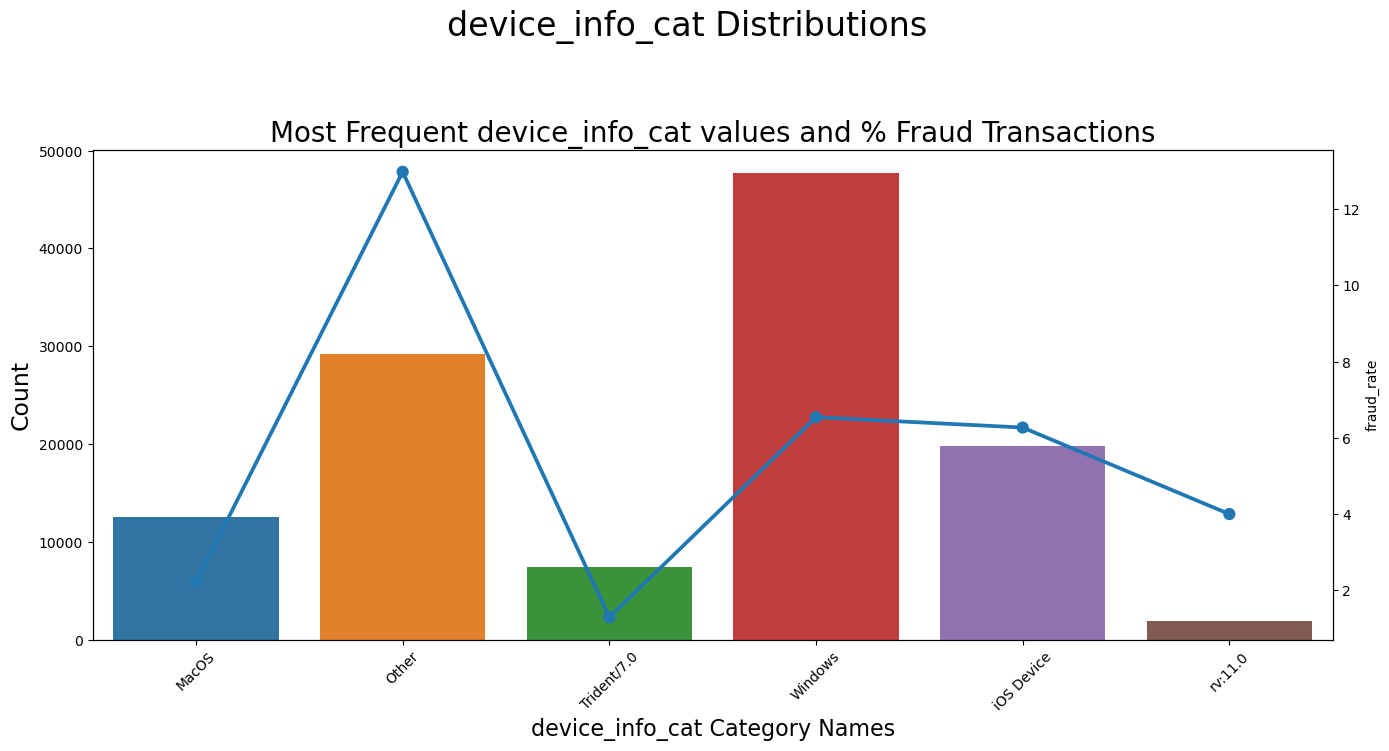

In [133]:
df_plotting(df_data, 'device_info_cat')

In [137]:
import datetime
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
df_data["Date"] = df_data['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
df_data['_Weekdays'] = df_data['Date'].dt.dayofweek
df_data['_Hours'] = df_data['Date'].dt.hour
df_data['_Days'] = df_data['Date'].dt.day

In [139]:
df_data["Date"].describe()

C:\Users\richa\AppData\Local\Temp\ipykernel_12184\1310529738.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_data["Date"].describe()


count                  144233
unique                 142734
top       2017-12-14 17:01:46
freq                        3
first     2017-12-02 00:01:46
last      2018-06-01 23:57:10
Name: Date, dtype: object

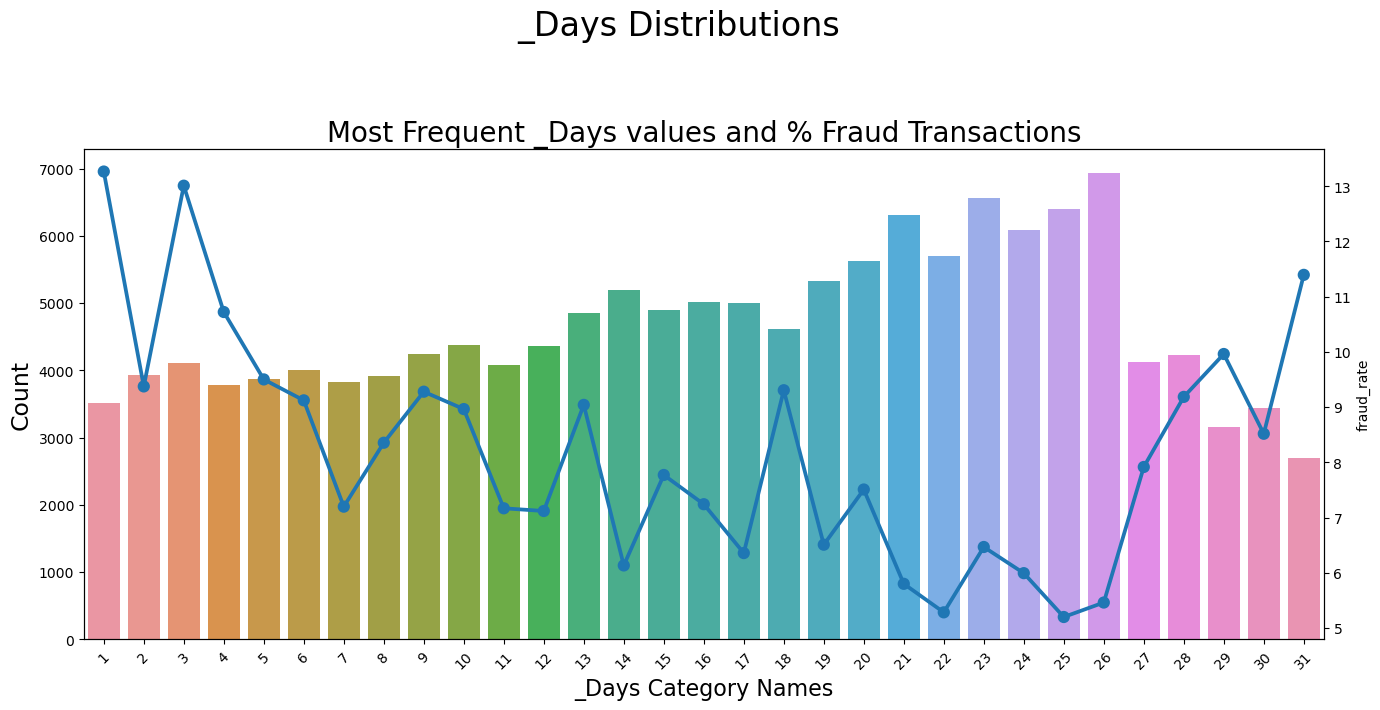

In [144]:
df_plotting(df_data, '_Days')

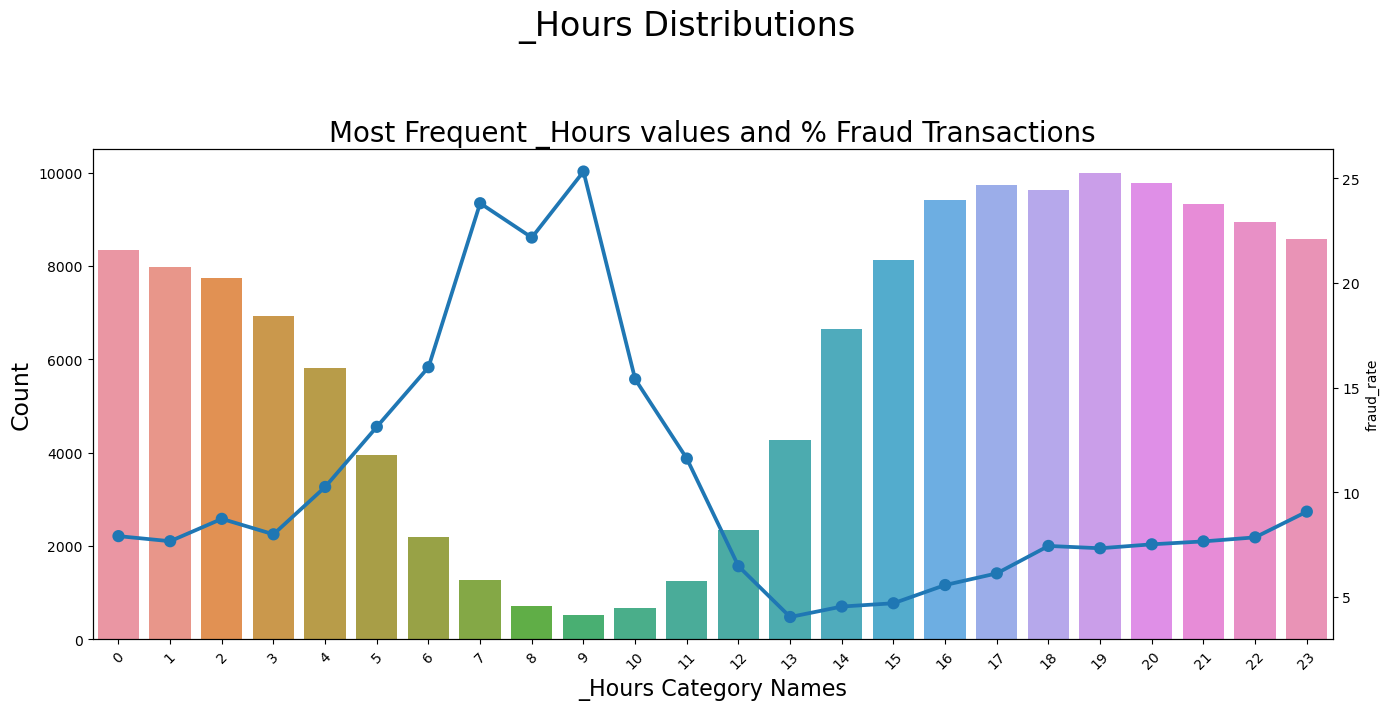

In [142]:
df_plotting(df_data, '_Hours')

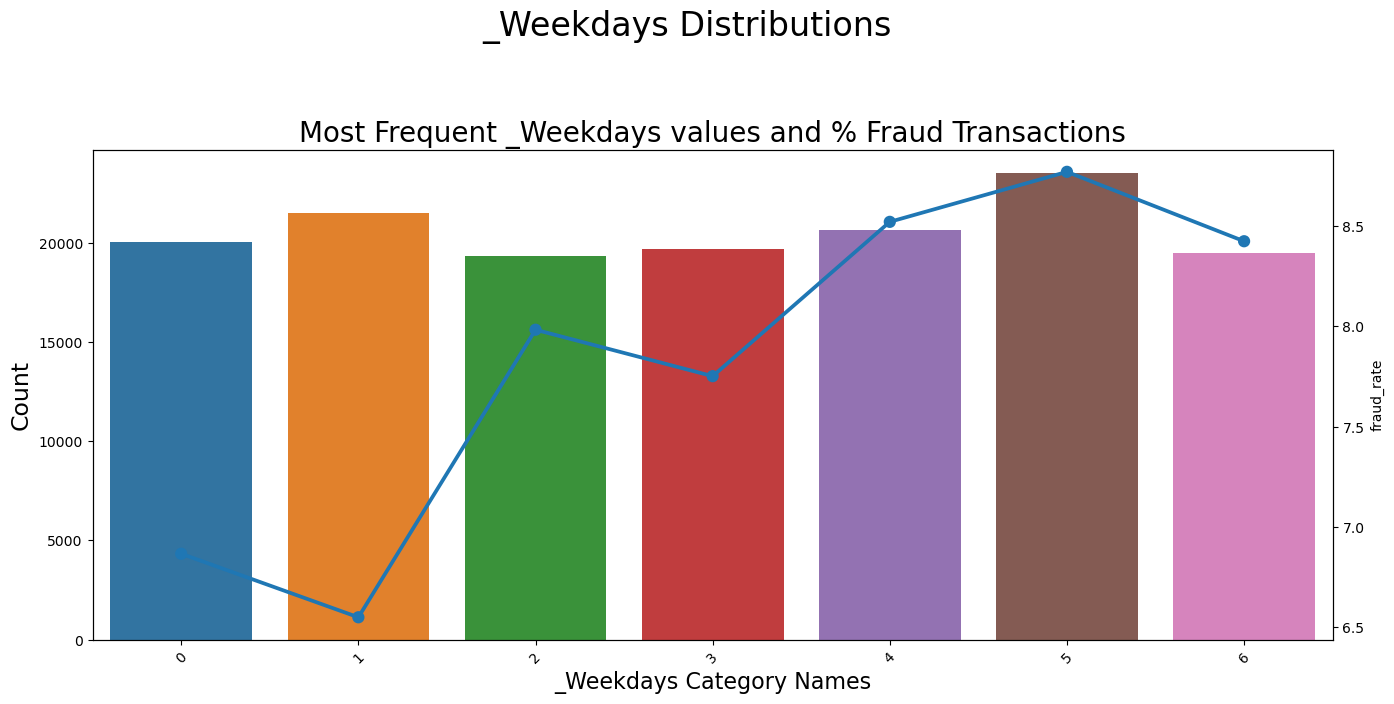

In [145]:
df_plotting(df_data, '_Weekdays')

In [150]:
df_data['Trans_min_mean'] = df_data['TransactionAmt'] - df_data['TransactionAmt'].mean()
df_data['Trans_min_std'] = df_data['Trans_min_mean'] / df_data['TransactionAmt'].std()

In [153]:
df_data.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card4', 'card6',
       'P_emaildomain', 'isFraud', 'DeviceType', 'DeviceInfo', 'ProductCD',
       'card4_american express', 'card4_discover', 'card4_mastercard',
       'card4_others', 'card4_visa', 'card6_charge card', 'card6_credit',
       'card6_debit', 'card6_nan', 'domain_name', 'device_info_cat',
       'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S',
       'ProductCD_W', 'DeviceType_desktop', 'DeviceType_mobile',
       'DeviceType_nan', 'Date', '_Weekdays', '_Hours', '_Days',
       'Trans_min_mean', 'Trans_min_std'],
      dtype='object')

In [155]:
df_data.to_csv("D:/data science/dataset1.csv", index=False)